# VacationPy
----

#### Note
* Keep an eye on your API usage. Use https://developers.google.com/maps/reporting/gmp-reporting as reference for how to monitor your usage and billing.

* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

## Biggest problem has been installing gmaps

Final solution has been not to install from jupyter (cell below) but from windows command executing this:

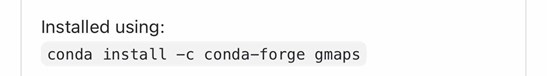

but with no conda activation, directly in command.

Then rebooting machine

In [1]:
# !pip install gmaps

In [2]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import gmaps
import os
import json

# Import API key. I will not pass config with keys to GitHub because I get mails from
# google and weathermapAPI regarding security compromised and block my keys for further uses
from config import g_key
# g_key

### Store Part I results into DataFrame
* Load the csv exported in Part I to a DataFrame

In [3]:
# reading the .csv file and storing it into dataframe
weather_data_df = pd.read_csv("../WeatherPy/clean_city_data_df.csv")
# Creating data with columns of data needed for exercise and discarding rest 
weather_data_df = weather_data_df[["City", "Lat", "Lng",
                                   "Country", "Max.Temp","Humidity","Cloudiness", "Wind Speed"]]
weather_data_df



,City,Lat,Lng,Country,Max.Temp,Humidity,Cloudiness,Wind Speed
0,Nizhnevartovsk,60.9344,76.5531,RU,-3.00,93,90,2.00
1,Mataura,-46.1927,168.8643,NZ,12.22,96,82,0.89
2,Albany,42.6001,-73.9662,US,12.22,19,0,2.24
3,Esperance,-33.8667,121.9000,AU,14.00,94,51,4.12
4,Hilo,19.7297,-155.0900,US,21.00,83,90,4.63
...,...,...,...,...,...,...,...,...
494,Yining,29.0361,114.5636,CN,9.72,96,100,1.46
495,Maxixe,-23.8597,35.3472,MZ,23.50,87,3,1.09
496,Yanam,16.7333,82.2167,IN,21.74,84,97,0.94
497,Truth or Consequences,33.1284,-107.2528,US,26.11,11,1,10.29


In [4]:
# Drop NaN entries in table
weather_data_df =weather_data_df.dropna()
weather_data_df

,City,Lat,Lng,Country,Max.Temp,Humidity,Cloudiness,Wind Speed
0,Nizhnevartovsk,60.9344,76.5531,RU,-3.00,93,90,2.00
1,Mataura,-46.1927,168.8643,NZ,12.22,96,82,0.89
2,Albany,42.6001,-73.9662,US,12.22,19,0,2.24
3,Esperance,-33.8667,121.9000,AU,14.00,94,51,4.12
4,Hilo,19.7297,-155.0900,US,21.00,83,90,4.63
...,...,...,...,...,...,...,...,...
494,Yining,29.0361,114.5636,CN,9.72,96,100,1.46
495,Maxixe,-23.8597,35.3472,MZ,23.50,87,3,1.09
496,Yanam,16.7333,82.2167,IN,21.74,84,97,0.94
497,Truth or Consequences,33.1284,-107.2528,US,26.11,11,1,10.29


In [5]:
# Save new clean data frame to CSV
weather_data_df.to_csv('weather_data_dropna.csv')

### Humidity Heatmap
* Configure gmaps.
* Use the Lat and Lng as locations and Humidity as the weight.
* Add Heatmap layer to map.

In [15]:
gmaps.configure(api_key=g_key)
# print()

In [16]:
# Convert Humidity to float and store
humidity = weather_data_df["Humidity"].astype(float)
# print(humidity)

# # Store 'Latitude' and 'Longitude' into  locations. 
locations = weather_data_df[["Lat", "Lng"]].astype(float)
# # locations
# locations.dtypes

# Create a humidity Heatmap layer
# create map
fig = gmaps.figure()
# default parameters of the map
figure_layout = {
    'width': '1000px',           # width 1000 pixels
    'height': '600px',
    'border': '1px solid black',
    'padding': '1px',
    'margin': '0 auto 0 auto'}

# Plot map with center in specific parameters and zoom
fig = gmaps.figure(center=(40.0, -20.0), zoom_level=2)

# humidity.dtypes
# parameter for additional layer with heat plots, located in previously stored lat and long
# to locations and intensity depending humidity
heat_layer = gmaps.heatmap_layer(locations, 
                                 weights=humidity, 
                                 dissipating=False, 
                                 max_intensity=40,
                                 point_radius = 1)

# plot heat layer over map
fig.add_layer(heat_layer)

fig

Figure(layout=FigureLayout(height='420px'))

### Create new DataFrame fitting weather criteria
* Narrow down the cities to fit weather conditions.
* Drop any rows will null values.

In [8]:
wonder_places_df = weather_data_df
# A max temperature lower than 80 degrees but higher than 70. 
# in my case CELSIUS 26 < x < 21 degrees
wonder_places_df = wonder_places_df.loc[(wonder_places_df["Max.Temp"] < 26) 
                                        & (wonder_places_df["Max.Temp"] > 21)]

# Wind speed less than 10 mph. Metric 16 kph
wonder_places_df = wonder_places_df.loc[wonder_places_df["Wind Speed"] < 16]

# Zero cloudiness.
wonder_places_df = wonder_places_df.loc[wonder_places_df["Cloudiness"] == 0]

# To filter more data i will include places with humidity below 50 because less sweating
# in spite of wonderful temperature is my preference. Supress mosquitoes' activity too
wonder_places_df = wonder_places_df.loc[wonder_places_df["Humidity"] < 50]

# Drop any rows that don't contain all 4 conditions. You want to be sure the weather is ideal.
wonder_places_df = wonder_places_df.dropna()
wonder_places_df


,City,Lat,Lng,Country,Max.Temp,Humidity,Cloudiness,Wind Speed
70,Sabha,27.0377,14.4283,LY,22.77,17,0,2.65
103,General Roca,-39.0333,-67.5833,AR,25.00,31,0,3.60
210,Samdari,25.8167,72.5833,IN,23.52,22,0,1.97
242,Hurghada,27.2574,33.8129,EG,23.00,43,0,2.80
290,Nizwá,22.9333,57.5333,OM,22.88,26,0,1.83
292,Taoudenni,22.6783,-3.9836,ML,23.17,7,0,4.18
314,Losal,27.4000,74.9167,IN,22.44,25,0,2.42
341,Rājākhera,26.8961,78.1714,IN,23.08,22,0,0.53
345,Perth,-31.9333,115.8333,AU,23.33,35,0,5.14
370,Sangamner,19.5667,74.2167,IN,22.05,34,0,0.89


### Hotel Map
* Store into variable named `hotel_df`.
* Add a "Hotel Name" column to the DataFrame.
* Set parameters to search for hotels with 5000 meters.
* Hit the Google Places API for each city's coordinates.
* Store the first Hotel result into the DataFrame.
* Plot markers on top of the heatmap.

In [9]:
# create a dataframe to later add hotels as column
hotel_df = wonder_places_df
hotel_df

,City,Lat,Lng,Country,Max.Temp,Humidity,Cloudiness,Wind Speed
70,Sabha,27.0377,14.4283,LY,22.77,17,0,2.65
103,General Roca,-39.0333,-67.5833,AR,25.00,31,0,3.60
210,Samdari,25.8167,72.5833,IN,23.52,22,0,1.97
242,Hurghada,27.2574,33.8129,EG,23.00,43,0,2.80
290,Nizwá,22.9333,57.5333,OM,22.88,26,0,1.83
292,Taoudenni,22.6783,-3.9836,ML,23.17,7,0,4.18
314,Losal,27.4000,74.9167,IN,22.44,25,0,2.42
341,Rājākhera,26.8961,78.1714,IN,23.08,22,0,0.53
345,Perth,-31.9333,115.8333,AU,23.33,35,0,5.14
370,Sangamner,19.5667,74.2167,IN,22.05,34,0,0.89


In [11]:
#Set parameters to search for hotels within 5000 meters of location.
base_url = "https://maps.googleapis.com/maps/api/place/nearbysearch/json?"

params = {"type" : "hotel",       # Google type for gmaps
          "keyword" : "hotel",
          "radius" : 5000,        # within 5000 meters range  
          "key" : g_key}          # API key to enter in gmaps data

# #Add a "Hotel Name" column to the DataFrame
# hotel_df["Hotel Name"] = ""
# # hotel_df

# begin loop of dataframe
for index, row in hotel_df.iterrows():
    lat = row["Lat"]               # extract latitude, longitude and city from dataframe
    lng = row["Lng"]
    city_name = row["City"]
    
    params["location"] = f"{lat},{lng}" # add location as parameter list by including lat lng
    
    print("")                                                # 1 empty line as loop separator 
    print(f"Retrieving Results for city: {city_name}.")      
    response = requests.get(base_url, params=params).json()  # accessing data json
    results = response['results']
#     print(results)

    try:
        # Getting closest hotel
        print(f"Closest hotel in {city_name} is {results[0]['name']}.")
        # Add hotel to "Hotel name" column in hotel_df dataframe
        hotel_df.loc[index, "Hotel Name"] = results[0]['name']
    except (KeyError, IndexError):
        # if google nearby is not able to retrieve a result
        print("Could not find result")
        # jump to next record
        pass
# print finishing loop
print("")
print("-----------End Search---------")
# hotel_df


Retrieving Results for city: Sabha.
Closest hotel in Sabha is فندق المواجيد.

Retrieving Results for city: General Roca.
Closest hotel in General Roca is Hotel y Resto la Fundacion.

Retrieving Results for city: Samdari.
Could not find result

Retrieving Results for city: Hurghada.
Closest hotel in Hurghada is Marina Star Hotel.

Retrieving Results for city: Nizwá.
Closest hotel in Nizwá is Nizwa Residence Hotel Apartments.

Retrieving Results for city: Taoudenni.
Could not find result

Retrieving Results for city: Losal.
Closest hotel in Losal is Gangaur Hotel.

Retrieving Results for city: Rājākhera.
Could not find result

Retrieving Results for city: Perth.
Closest hotel in Perth is Quay Perth.

Retrieving Results for city: Sangamner.
Closest hotel in Sangamner is Hotel Mayur Express.

Retrieving Results for city: Buin.
Closest hotel in Buin is Paihuen.

Retrieving Results for city: Qaryat Sulūq.
Could not find result

Retrieving Results for city: Shirpur.
Closest hotel in Shirpur 

In [12]:
hotel_df = hotel_df.dropna()   # Drop empty values if exists
hotel_df                       # show final dataframe with hotels


# hotel_df = hotel_df["Hotel Name"].replace('', np.nan, inplace=True)
# hotel_df

# # dfNew = df[filter]

,City,Lat,Lng,Country,Max.Temp,Humidity,Cloudiness,Wind Speed,Hotel Name
70,Sabha,27.0377,14.4283,LY,22.77,17,0,2.65,فندق المواجيد
103,General Roca,-39.0333,-67.5833,AR,25.00,31,0,3.60,Hotel y Resto la Fundacion
242,Hurghada,27.2574,33.8129,EG,23.00,43,0,2.80,Marina Star Hotel
290,Nizwá,22.9333,57.5333,OM,22.88,26,0,1.83,Nizwa Residence Hotel Apartments
314,Losal,27.4000,74.9167,IN,22.44,25,0,2.42,Gangaur Hotel
345,Perth,-31.9333,115.8333,AU,23.33,35,0,5.14,Quay Perth
370,Sangamner,19.5667,74.2167,IN,22.05,34,0,0.89,Hotel Mayur Express
392,Buin,-33.7333,-70.7500,CL,25.00,29,0,2.57,Paihuen
471,Shirpur,21.3500,74.8833,IN,24.67,44,0,1.69,Hotel AARAM
474,Neuquén,-38.9516,-68.0591,AR,25.00,31,0,3.60,Hilton Garden Inn Neuquen


In [13]:
# NOTE: Do not change any of the code in this cell
# Using the template add the hotel marks to the heatmap
info_box_template = """
<dl>
<dt>Name</dt><dd>{Hotel Name}</dd>
<dt>City</dt><dd>{City}</dd>
<dt>Country</dt><dd>{Country}</dd>
</dl>
"""
# Store the DataFrame Row
# NOTE: be sure to update with your DataFrame name
hotel_info = [info_box_template.format(**row) for index, row in hotel_df.iterrows()]



In [14]:
# fill locations with latitude and longitude to feed markers for hotels
locations = hotel_df[["Lat", "Lng"]]
locations = hotel_df[["Lat", "Lng"]].astype(float)

# Uncomment following 9 lines if you want to plot a new map without heat layer
# # Customize the size of the figure
# figure_layout = {
#     'width': '1000px',
#     'height': '800px',
#     'border': '1px solid black',
#     'padding': '1px',
#     'margin': '0 auto 0 auto'}
# # plot map with parameters above
# fig = gmaps.figure(layout=figure_layout)

# Add marker layer and info box content on top of map
markers = gmaps.marker_layer(locations, info_box_content = hotel_info)

# Add the layer to the map
fig.add_layer(markers)

# Display Map
fig

Figure(layout=FigureLayout(height='420px'))